# Pandas
Pandas (Python Data Analysis Library) is an extremely popular module which you'll find at the top of a huge proportion of data science notebooks. Like numpy, it's also popular enough to deserve its own import idiom...

In [2]:
import pandas as pd
import numpy as np

To get a quick idea of the scope of pandas take a look at the autocomplete for pd.

In [ ]:
pd.

The fundamental objects in pandas are the `Series` and the `DataFrame`. These build on the idea of a numpy `ndarray`, but they add the idea of an index and they include a rich set of methods which we can use to manipulate data.

## Series
The pandas `Series` object is basically a one dimensional _indexed_ array. Schematically, they look like

| Index | Value |
|-------|-------|
| 0     |  0.12 |
| 1     |  0.24 |
| 2     |  0.36 |
| 3     |  0.48 |

Each series has an index and a value. Most of the time the index values are distinct (this isn't a firm requirement though!) but the index doesn't have to be integers. Any hashable type will do

In [3]:
s1 = pd.Series({'one' : 1.0, 'two': 2.0, 'three': 3.0})
s1

one      1.0
two      2.0
three    3.0
dtype: float64

One particularly common option is to use a timestamp as the index (don't worry about the syntax here, we'll come back to time-series later)...

In [5]:
dti = pd.date_range('2020-06-03', periods=3, freq='h')
pd.Series(['first', 'second', 'third'], index=dti)

2020-06-03 00:00:00     first
2020-06-03 01:00:00    second
2020-06-03 02:00:00     third
Freq: h, dtype: object

The next thing to notice is that the values all share the same type (e.g. `dtype: float64` for `s1`, `object` for `dti`). `pandas` will make `Series` of almost any type as long as all the rows share the same type, and it will always try to pick the most efficient implementation. For numerical values, it'll use `numpy.ndarrays`, but if it can't infer a specific type, it will fall back to a generic `object` type. It really pays (in speed) to keep an eye on the `dtype` and use a `numpy.ndarray` type where possible. For categorical values there is also a special `Categorical` `dtype` which can help later on when interfacing with `sklearn`.

### Making `Series`

You'll probably find that you want to deal with `DataFrames` more often than `Series`, but lots of operations in `panadas` return `Series` (or want them as an argument in some operation) so it's good to know a bit about them.

Like `ndarray`'s, you can initialize a `Series` from an iterable, by default it'll be given an ascending integer index

In [6]:
sf = pd.Series([1.0, 2.0, 3.0, 4.0, 5.0])
sf

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [7]:
si = pd.Series(range(5))
si

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [8]:
si.dtype

dtype('int64')

So far, this looks a lot like a numpy array (or even just a list), but we can switch the indexing to suit our needs, by explicitly passing the `index=` arguement

In [9]:
sm = pd.Series([1., 2., 3., 4., 5.], index=['one', 'two', 'three', 'four', 'five'])
sm

one      1.0
two      2.0
three    3.0
four     4.0
five     5.0
dtype: float64

### Indexing and Slicing

Square bracket notation will select by index value, this is convenient, but has ambiguities, particularly when you start manipulating `DataFrames` (see `.loc` and `.iloc` later for more flexibility). For a `Series` square brackets will try to match a row

In [10]:
sm['three']

3.0

Now the series is starting to look more like a dictionary, in fact, that's another good way to construct `Series`

In [11]:
sn = pd.Series({'one': 1, 'three': 3, 'two': 2, 'four': 4, 'five': 5})
sn

one      1
three    3
two      2
four     4
five     5
dtype: int64

It even has a keys method...

In [12]:
sn.keys()

Index(['one', 'three', 'two', 'four', 'five'], dtype='object')

When you look closely though, a Series has a few tricks that a dictionary doesn't...

In [13]:
sn['three':'four']

three    3
two      2
four     4
dtype: int64

N.B. label based indexes are _inclusive_ of the `stop` value. This is different from most other indexes you'll see in python, and can cause a little confusion. If you use numbers to do the slice, you'll get the familiar python behaviour

In [15]:
sn[1:3]

three    3
two      2
dtype: int64

We can operate on the entire series at ones, and the usual python binary and unary operators do the right thing. e.g. Element by element comparison statements evaluate to `Boolean`s

In [16]:
sn > 2

one      False
three     True
two      False
four      True
five      True
dtype: bool

and if you remember the material on numpy fancy indexing, this can be very useful

In [17]:
sn[sn > 2]

three    3
four     4
five     5
dtype: int64

You can combine these conditions in more complicated expressions, but be careful about `and` and `&` in general you want to arrange for bitwise operations on individual elements, e.g.

In [20]:
sn[(sn > 2) & (sn < 5)]

three    3
four     4
dtype: int64

There are also some extra indexing methods available to you: `.loc` & `.iloc`. These let you be much more explicit about exactly what you want to return. At a very basic level, they can help you avoid label confusion...

In [21]:
sa = pd.Series(data=['apple', 'banana', 'orange', 'pineapple'], index=[3, 2, 1, 7])

sa

3        apple
2       banana
1       orange
7    pineapple
dtype: object

Suppose we want the value in the 4th row...

In [23]:
sa[3]

'apple'

Nope, `3` was interperted as a label. There's an ambiguity because of the type of the index. Fortunately `pandas` gives us a pair of functions to avoid that problem

  * `.iloc[]`: Purely integer-location based indexing.
  * `loc[]` : Purely label based indexing.

In [24]:
sa.loc[3]

'apple'

In [26]:
sa.iloc[3]

'pineapple'

And both `.loc` and `.iloc` will also work with slices

In [27]:
sa.iloc[:3:2]

3     apple
1    orange
dtype: object

Logical and fancy indexing work here too

In [28]:
sa.iloc[[2, 1, 3]]

1       orange
2       banana
7    pineapple
dtype: object

Fancy indexing with boolean masks is pretty common

In [29]:
sn.loc[sn>3]

four    4
five    5
dtype: int64

_**Exercise**: Create a series with the letters of the alphabet as values (try using `enumerate`). Use the .`sort_index` method to reverse the `Series` and slice the result to pick out the values between `t` and `k` (inclusive)_

## DataFrames

Most of the time you will be using `DataFrames` rather than `Series` (though the result of many `DataFrame` operations is a `Series`), but at a first pass it is OK to think of `DataFrames` as a bunch of `Series` stuck together with a common index. 


| Index | Value1 | Value2 | 
|-------|--------|--------|
|   0   |  0.12  |   'a'  |
|   1   |  0.24  |   'b'  |
|   2   |  0.36  |   'c'  |
|   3   |  0.48  |   'd'  |

The rules discussed above for the index stay the same but notice that we can now have different types in the various columns

In [78]:
d1 = pd.DataFrame({'floats': sm, 'ints': sn})
d1

,floats,ints
five,5.0,5
four,4.0,4
one,1.0,1
three,3.0,3
two,2.0,2


In [79]:
d1.dtypes

floats    float64
ints        int64
dtype: object

Also, notice that when building a `DataFrame` out of multiple `Series`, pandas will try to align records based on the index values. This can be fine tuned, but the default behaviour is to fill in `NaN` or `None` values to indicate missing data. You will see something similar when we start looking at joining `DataFrames` below.

In [80]:
pd.DataFrame({
    'count' : {'a' : 1, 'b': 6, 'c': 3},
    'uppercase': {'a': 'A', 'c' : 'C', 'd': 'D'}
})

,count,uppercase
a,1.0,A
b,6.0,NaN
c,3.0,C
d,NaN,D


### DataFrame Attributes

We've already seen some of the attributes of the DataFrame (column etc.) but there are quite a few available, take a look at `index`, `columns`, `shape`, `dtypes`

In [81]:
d1.index

Index(['five', 'four', 'one', 'three', 'two'], dtype='object')

In [82]:
d1.columns

Index(['floats', 'ints'], dtype='object')

In [83]:
d1.shape

(5, 2)

In [84]:
d1.dtypes

floats    float64
ints        int64
dtype: object

There are also some useful utility functions for getting oriented with the contents of the dataframe

In [85]:
d1.describe()

,floats,ints
count,5.000000,5.000000
mean,3.000000,3.000000
std,1.581139,1.581139
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


(For richer datasets, if you pass `include=all` to describe, it will also try to tell you what it can about non-numerical values)

In [86]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, five to two
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   floats  5 non-null      float64
 1   ints    5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 120.0+ bytes


In [87]:
d1.tail(n=3)

,floats,ints
one,1.0,1
three,3.0,3
two,2.0,2


### Indexing

One important thing to note is when indexing a dataframe, the default is to give you the column (you can also use the syntax `d1.ints`)

In [88]:
d1['ints']

five     5
four     4
one      1
three    3
two      2
Name: ints, dtype: int64

If you are looking for the row, then try `.loc` with the row index value

In [89]:
d1.loc['one']

floats    1.0
ints      1.0
Name: one, dtype: float64

In fact, you probably want to lean towards `.loc` when you want to subset rows and/or columns. It is much more flexible and helps pandas resolve some potential ambiguities about what you want to select. Here is a column selection...

In [90]:
d1.loc['four':, ['ints']]

,ints
four,4
one,1
three,3
two,2


(The square brackets around `'ints'` here tell pandas I want a `DataFrame` to be returned, rather than a `Series`)

In [91]:
d1.iloc[:2]

,floats,ints
five,5.0,5
four,4.0,4


In [92]:
# `.iloc will interprete both row and column specifiers as numerical positions
d1.iloc[:2, 1]

five    5
four    4
Name: ints, dtype: int64

Logical/fancy indexing works with `.loc` and `.iloc` as well, but remember the parentheses or `&` will be interpreted as a bitwise operator.

In [93]:
d1.loc[(d1['ints'] > 2) & (d1['floats'] < 4), ['ints']]

,ints
three,3


Selecting a single column will return a series, so you'll have access to Series methods

In [94]:
type(d1['ints'])

pandas.core.series.Series

In [95]:
d1.loc[d1.ints.isin((1, 4))]

,floats,ints
four,4.0,4
one,1.0,1


### Manipulating DataFrames


Certain operations can modify a `DataFrame` in place, e.g.

In [96]:
d1.iloc[1] = (3.0, 3)
d1

,floats,ints
five,5.0,5
four,3.0,3
one,1.0,1
three,3.0,3
two,2.0,2


In [97]:
print(f"Before {id(d1)}")
d1['ratio'] = d1['ints'] / (2 * d1['floats'])
print(f"After {id(d1)}")
d1



Before 140220490011472
After 140220490011472


,floats,ints,ratio
five,5.0,5,0.5
four,3.0,3,0.5
one,1.0,1,0.5
three,3.0,3,0.5
two,2.0,2,0.5


And some functions/methods support the `inplace=True` keyword argument

In [98]:
d6 = d1.copy()
d6.replace(5, 6, inplace=True)
d6

,floats,ints,ratio
five,6.0,6,0.5
four,3.0,3,0.5
one,1.0,1,0.5
three,3.0,3,0.5
two,2.0,2,0.5


But generally pandas will return a copy of the `DataFrame` or `Series` in question. This sounds a bit wasteful, but most of the time it is better to worry about it. The main time it comes up is when you try to do something like

In [99]:
d1['floats']['five'] = 5.1

/tmp/ipykernel_508/3754205575.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  d1['floats']['five'] = 5.1
/tmp/ipykernel_508/3754205575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [100]:
d1.loc['five', 'floats'] = 5.1

You probably intended to modify the values in place, but as the warning message said, the implementation would have made the changes to a copy of the data, leaving the original unmodified. This is such a common mistake that the warning includes a proposed fix which would do the right thing. Basically the fix lets python think about your assignment statement in one step, rather than trying to break it into two separate operations with the chained `[][]` notation. You coud use `.loc` as described above or for a single value, there is an efficient `.at` method...

In [101]:
d1.at['five', 'floats'] = 5.0

For more general cases you can use `pd.DataFrame.loc`, (N.B. Avoid chained indexing ([][])

In [102]:
d1.loc[:, 'floats'] += 0.1
d1

,floats,ints,ratio
five,5.1,5,0.5
four,3.1,3,0.5
one,1.1,1,0.5
three,3.1,3,0.5
two,2.1,2,0.5


`pandas` also has facilities like `fillna` or `replace` for manipulating `DataFrames` to fill in multiple missing values using various strategies, we'll look at those later.

## DataFrame Methods

There are *lots* of methods for operating on DataFrames, have a look at the tab completion and explore the documentation for them. In particular, take a look at the help for `describe`, `head` and `tail`. These are great for orienting yourself with a new dataset

We won't have time to dive into all of the methods but we'll sample a few, then you should explore the documentation for others. Some of the most often used are

* `min`, `max`
* `mean`, `mode`, `median`
* `max`, `min`, `idxmax`, `idxmin`
* `any`, `all`
* `astype`
* `dropna`
* `sort_index`, `sort_values`
* `plot`

In most cases pandas operations will return a copy of the `DataFrame` or `Series` in question. If you want to avoid that, for simple cases, the `inplace=True` argument can help, or for more advanced cases `pd.eval` and `pd.query` can also optimize some operations. A related project called [polars](https://pola.rs/) also implements DataFrames efficiently and shares a lot with pandas.

In [103]:
d1.min()

floats    1.1
ints      1.0
ratio     0.5
dtype: float64

In [104]:
(d1 > 3).any(axis=1)

five      True
four      True
one      False
three     True
two      False
dtype: bool

You can coerce values to different type

In [107]:
d1['floats'].astype(int)

five     5
four     3
one      1
three    3
two      2
Name: floats, dtype: int64

And sort values (or indices)

In [108]:
d1.sort_values('floats')

,floats,ints,ratio
one,1.1,1,0.5
two,2.1,2,0.5
three,3.1,3,0.5
four,3.1,3,0.5
five,5.1,5,0.5


_**Exercise**: Calculate the mean value of the floats column and use it to calculate how far each float is from the mean_

The `dropna` method can come in handy sometimes. In general, pandas is very good at [handling missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html), but in some other modules will choke when they encounter a `np.NaN`

In [112]:
d1.at['three', 'floats'] = np.NaN
d1

,floats,ints,ratio
five,5.1,5,0.5
four,3.1,3,0.5
one,1.1,1,0.5
three,NaN,3,0.5
two,2.1,2,0.5


Operating directly on the numpy array...

In [116]:
d1['floats'].values

array([5.1, 3.1, 1.1, nan, 2.1])

In [117]:
d1['floats'].values.mean()

nan

Operating through pandas...

In [118]:
d1['floats'].mean()

2.8499999999999996

In [119]:
d1['floats'].dropna().values.mean()

2.8499999999999996

There are also convenience methods like `.ffill` for forward or backward filling missing values etc.

N.B. NaN is only defined for floating point, so adding a NaN to an integer column usually involves, recently however, pandas has been adding more general support for [nullable types](https://pandas.pydata.org/docs/user_guide/integer_na.html)

## Working with External Data

Data comes in many forms from simple csv/json files, real-time APIs, structured binary files and many others. Try `pd.read_<TAB>` to see some of the `pandas` ingestion options. `read_csv` is the main workhorse for data sets which will fit on a single machine. It is way more flexible than it's name suggests (S3 buckets, https, compressed files, ...) and many of the arguments to `read_csv` will have equivalents for the other functions, so we'll start by looking at it.
    
We need a CSV to work with. The city of Vancouver has an [open data catalog](https://vancouver.ca/your-government/open-data-catalogue.aspx), which has CSV for some of the datasets. There's a dataset which lists all of the [community gardens and food trees](https://opendata.vancouver.ca/explore/dataset/community-gardens-and-food-trees/information/) maintained by the city. A copy of it is available in this directory called `CommunityGardensAndFoodTrees.csv`

In [120]:
gardenDF = pd.read_csv(
    "https://opendata.vancouver.ca/explore/dataset/community-gardens-and-food-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B",
    delimiter=';'
)
gardenDF.shape

(168, 20)

So there are 168 rows, with 20 columns, here are the fist few rows

In [121]:
gardenDF.head()

,MAPID,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
0,FA001,Pre-2010,0 - Private Developments - Community Shared,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN
1,FA006,2011,Adanac Park Community Garden,1025,NaN,Boundary,Road,"1025 Boundary Road, Vancouver, BC",50.0,8,Some plots are accessible,1 Early McIntosh Apple; 1 Jonagold apple; 2 it...,NaN,Park Board,Adanac Community Garden Society,Adanaccommunitygarden@gmail.com,http://adanacparkcommunitygarden.blogspot.ca/,Hastings-Sunrise,"{""coordinates"": [-123.02439453, 49.27558227], ...","49.27558227,-123.02439453"
2,FA013,2012,Brewery Creek Community Garden,2390,NaN,Brunswick,St,"2390 Brunswick St, Vancouver, BC",40.0,11,NaN,Bramley's seedling apple; cortland apple; earl...,NaN,Park Board,Urban Diggers Society,brewerycreekgarden@gmail.com,http://brewerycreekgarden.wix.com/home,Mount Pleasant,"{""coordinates"": [-123.09573323, 49.26416489], ...","49.26416489,-123.09573323"
3,FA014,NaN,Burrard View Park,650,N,Penticton,St,"650 N Penticton St, Vancouver, BC",0.0,1,NaN,Cherry,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0519175, 49.2912065], ""t...","49.2912065,-123.0519175"
4,FA015,pre-1970,Callister Park,2875,NaN,Oxford,St,"2875 Oxford St, Vancouver, BC",0.0,4,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0453833, 49.28618], ""typ...","49.28618,-123.0453833"


So we can tell things like the gardens were created (`YEAR_CREATED`), and where the are (`LATITUDE`, `LONGITUDE`), and who's responsible for them (`STEWARD_OR_MANAGING_ORGANIZATION`). 

Now it is time to clean the data. This is a hugely important step and will generally eat a lot of your time, but it is worth doing right. Having mistakes in your data can undermine everything you subsequently try to infer from it.

First let's look at the index, the default is to index by integer, but we could have picked any column instead. It looks like the first column is unique (`MAPID`) and so let's use that (chosing the index right can make your life much easier when adding data or combining multiple DataFrames). The `inplace=True` argument means modify the existing dataframe rather than returning a modified copy

In [122]:
gardenDF.set_index('MAPID', inplace=True)

One useful trick when cleaning data is to look at the unique values in a column. You'll often catch coding mistakes or values being used as placeholders this way, e.g.

In [124]:
gardenDF['YEAR_CREATED'].unique()

array(['Pre-2010', '2011', '2012', nan, 'pre-1970', '2013', '2008',
       '2006', '1992', '2014', '2009', '2010', '2015', '1986', '1996',
       '2003', '2016', '2017', '2018', '1985', '2019', '2020', '2021',
       '1942', '2007', 'pre 2000', '1978', '1990', '2002', '1993', '1995',
       '1988', '1999', '2022'], dtype=object)

Value counts can also be useful to spot outliers

In [126]:
gardenDF['Geo Local Area'].value_counts()

Geo Local Area
Mount Pleasant              24
Hastings-Sunrise            16
Kensington-Cedar Cottage    15
Kitsilano                   14
Renfrew-Collingwood         11
Grandview-Woodland          10
Strathcona                  10
Fairview                     9
West End                     7
Riley Park                   7
Killarney                    7
Marpole                      7
Sunset                       5
West Point Grey              4
Oakridge                     3
Dunbar-Southlands            3
Victoria-Fraserview          3
Kerrisdale                   3
Shaughnessy                  2
Arbutus Ridge                2
South Cambie                 2
Downtown                     2
Name: count, dtype: int64

For the `YEAR_CREATED`, `Pre-2010`, `pre-1970` and `pre 2000` are kind of usless (and inconsistent!) so let's toss them

In [127]:
for badLabel in ['Pre-2010', 'pre-1970', 'pre 2000']:
    gardenDF = gardenDF.loc[gardenDF['YEAR_CREATED'] != badLabel]

# gardenDF.query("YEAR_CREATED in ['Pre-2010', 'pre-1970', 'pre 2000']")

gardenDF['YEAR_CREATED'].unique()

array(['2011', '2012', nan, '2013', '2008', '2006', '1992', '2014',
       '2009', '2010', '2015', '1986', '1996', '2003', '2016', '2017',
       '2018', '1985', '2019', '2020', '2021', '1942', '2007', '1978',
       '1990', '2002', '1993', '1995', '1988', '1999', '2022'],
      dtype=object)

There's still an `np.NaN`, and the years are strings (numbers would be better, or even dates). We can take a closer look at the rows which are missing their `YEAR_CREATED` using isnull

In [129]:
gardenDF.loc[gardenDF['YEAR_CREATED'].isnull()]

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
MAPID,,,,,,,,,,,,,,,,,,,
FA014,NaN,Burrard View Park,650,N,Penticton,St,"650 N Penticton St, Vancouver, BC",0.0,1,NaN,Cherry,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0519175, 49.2912065], ""t...","49.2912065,-123.0519175"
FA145,NaN,Van Dusen Botanical Gardens,5251,NaN,Oak,St,"5251 Oak St, Vancouver, BC",0.0,yes,NaN,Heritage apple,NaN,Park Board,Van Dusen Botanical Garden Association,NaN,NaN,Shaughnessy,"{""coordinates"": [-123.1280384, 49.2375047], ""t...","49.2375047,-123.1280384"
FA017,NaN,Carnarvon Park,2995,W,19th,Av,"2995 W 19th Av, Vancouver, BC",0.0,15,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,Arbutus Ridge,"{""coordinates"": [-123.171486, 49.2565789], ""ty...","49.2565789,-123.171486"
FA024,NaN,Charles Park,3400,NaN,Charles,St,"3400 Charles St, Vancouver, BC",0.0,1,NaN,Crabapple,NaN,Park Board,NaN,NaN,NaN,Hastings-Sunrise,"{""coordinates"": [-123.0308947, 49.2732079], ""t...","49.2732079,-123.0308947"
FA046,NaN,Delamont Park,2091,W,7th,Av,"2091 W 7th Av, Vancouver, BC",0.0,8,NaN,"Cherry, Asian pear, plum, hazelnut",NaN,Park Board,NaN,NaN,NaN,Kitsilano,"{""coordinates"": [-123.152619, 49.2658197], ""ty...","49.2658197,-123.152619"
FA055,NaN,Everett Crowley Park,8200,NaN,Kerr,St,"8200 Kerr St, Vancouver, BC",0.0,2,NaN,"Cherry, pear",NaN,Park Board,NaN,NaN,NaN,Killarney,"{""coordinates"": [-123.0380764, 49.2111116], ""t...","49.2111116,-123.0380764"
FA184,NaN,Van Tech secondary school,2600,E,Broadway,NaN,"2600 E Broadway , Vancouver, BC",0.0,5,NaN,NaN,NaN,Private,NaN,NaN,NaN,Renfrew-Collingwood,"{""coordinates"": [-123.051705, 49.261776], ""typ...","49.261776,-123.051705"
FA008,NaN,Arbutus Village Park,4202,NaN,Valley,Drive,"4202 Valley Drive, Vancouver, BC",0.0,9,NaN,Crabapple,NaN,Park Board,NaN,NaN,NaN,Arbutus Ridge,"{""coordinates"": [-123.1549951, 49.2507172], ""t...","49.2507172,-123.1549951"
FA010,NaN,Barclay Heritage Square,1433,NaN,Barclay,St,"1433 Barclay St, Vancouver, BC",0.0,2,NaN,Apple,NaN,Park Board,NaN,NaN,NaN,West End,"{""coordinates"": [-123.13284501, 49.28738755], ...","49.28738755,-123.13284501"


Pandas has some facilities for [dealing with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html) as well as some helpful default behaviours. Additionally, the `.isna` and `.notna` methods can help you explicitly deal with missing values during operations, e.g.

In [130]:
missingDF = pd.DataFrame(
    np.random.randn(4, 3),
    index = ['one', 'two', 'three', 'four'],
    columns = ['a', 'b', 'c']
)
missingDF['d'] = list(np.random.randn(2)) + [np.nan] + [np.random.randn()]
missingDF

,a,b,c,d
one,1.259562,-0.111650,-0.994044,0.141111
two,-0.335466,-2.487182,2.862877,-1.223970
three,0.202517,0.859145,0.031116,NaN
four,-1.076527,0.373243,0.516292,-0.932550


_**Exercise**:In some cases you might want to patch up missing data by combining one DataFrame with another, or by interpolating from nearby values_

  * _Use `.ffill` to fill with the value from the row above and/or below_
  * _Fill with the mean of the other row/column values_

Getting back to our example, for cases where that isn't possible (like here, where I'm too lazy), you can also just throw away the rows without valid years

In [131]:
gardenDF.dropna(axis=0, subset=['YEAR_CREATED'], inplace=True)
gardenDF

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE,Geo Local Area,Geom,geo_point_2d
MAPID,,,,,,,,,,,,,,,,,,,
FA006,2011,Adanac Park Community Garden,1025,NaN,Boundary,Road,"1025 Boundary Road, Vancouver, BC",50.0,8,Some plots are accessible,1 Early McIntosh Apple; 1 Jonagold apple; 2 it...,NaN,Park Board,Adanac Community Garden Society,Adanaccommunitygarden@gmail.com,http://adanacparkcommunitygarden.blogspot.ca/,Hastings-Sunrise,"{""coordinates"": [-123.02439453, 49.27558227], ...","49.27558227,-123.02439453"
FA013,2012,Brewery Creek Community Garden,2390,NaN,Brunswick,St,"2390 Brunswick St, Vancouver, BC",40.0,11,NaN,Bramley's seedling apple; cortland apple; earl...,NaN,Park Board,Urban Diggers Society,brewerycreekgarden@gmail.com,http://brewerycreekgarden.wix.com/home,Mount Pleasant,"{""coordinates"": [-123.09573323, 49.26416489], ...","49.26416489,-123.09573323"
FA016,2013,Cambie Park Community Garden,500,W,54th,Av,"500 W 54th Av, Vancouver, BC",30.0,NaN,NaN,NaN,NaN,Park Board,Cambie Park Community Gardening Society,southvangreenthumbs@gmail.com,NaN,Oakridge,"{""coordinates"": [-123.1186284, 49.22130853], ""...","49.22130853,-123.1186284"
FA025,2013,Charleson Park Community Garden,999,NaN,Charleson,St,"999 Charleson St, Vancouver, BC",38.0,NaN,NaN,NaN,NaN,Park Board,False Creek South Neighbourhood Association,charlesongarden@gmail.com,http://www.charlesongarden.ca/,Fairview,"{""coordinates"": [-123.12573796, 49.26776479], ...","49.26776479,-123.12573796"
FA036,2008,Cityview Baptist Church,4370,NaN,Sophia,St,"4370 Sophia St, Vancouver, BC",6.0,1,NaN,Heritage apple,NaN,Private,Neighbours,cityview.community.garden@gmail.com,http://cityviewchurch.ca/,Riley Park,"{""coordinates"": [-123.099148, 49.2459664], ""ty...","49.2459664,-123.099148"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA182,2019,Macleod Manor Community Garden,8725,NaN,French,St,"8725 French St, Vancouver, BC",5.0,NaN,NaN,NaN,NaN,Private,Brightside Community Homes Foundation,NaN,NaN,Marpole,"{""coordinates"": [-123.1396302, 49.2069012], ""t...","49.2069012,-123.1396302"
FA185,2020,Astoria Community Garden,369,NaN,Hawks,Av,"369 Hawks Av, Vancouver, BC",138.0,NaN,NaN,NaN,NaN,Private,managed by DTES NH House,ED@dtesnhouse.ca,NaN,Strathcona,"{""coordinates"": [-123.087377, 49.28134], ""type...","49.28134,-123.087377"
FA187,2020,Centrepoint Gardens,2990,NaN,Quebec,St,"2990 Quebec St, Vancouver, BC",20.0,NaN,NaN,NaN,NaN,Private,Centrepoint Development,centrepoint.caretaker@hotmail.com,NaN,Mount Pleasant,"{""coordinates"": [-123.102952, 49.258797], ""typ...","49.258797,-123.102952"


Now it might make sense to convert that column to a numerical value

In [132]:
pd.to_numeric(gardenDF['YEAR_CREATED'])

MAPID
FA006    2011
FA013    2012
FA016    2013
FA025    2013
FA036    2008
         ... 
FA182    2019
FA185    2020
FA187    2020
FA189    1978
FA191    2022
Name: YEAR_CREATED, Length: 152, dtype: int64

or better yet, a DateTime object

In [133]:
gardenDF['YEAR_CREATED'] = pd.to_datetime(gardenDF['YEAR_CREATED'])
gardenDF['NUMBER_OF_FOOD_TREES'] = pd.to_numeric(gardenDF['NUMBER_OF_FOOD_TREES'].str.replace('yes', '1'))
gardenDF['NUMBER_OF_PLOTS'] = pd.to_numeric(gardenDF['NUMBER_OF_PLOTS'])
gardenDF['STREET_DIRECTION'] = gardenDF['STREET_DIRECTION'].astype('category')
gardenDF.dtypes

YEAR_CREATED                        datetime64[ns]
NAME                                        object
STREET_NUMBER                               object
STREET_DIRECTION                          category
STREET_NAME                                 object
STREET_TYPE                                 object
MERGED_ADDRESS                              object
NUMBER_OF_PLOTS                            float64
NUMBER_OF_FOOD_TREES                       float64
NOTES                                       object
FOOD_TREE_VARIETIES                         object
OTHER_FOOD_ASSETS                           object
JURISDICTION                                object
STEWARD_OR_MANAGING_ORGANIZATION            object
PUBLIC_E_MAIL                               object
WEBSITE                                     object
Geo Local Area                              object
Geom                                        object
geo_point_2d                                object
dtype: object

Sometimes you are not so lucky and will have to parse through strings to extract the information you are looking for. The `Geom` column looks like latitude and longitude stored as json, lets parse an individual entry

In [134]:
import json

geom = gardenDF.iloc[-1]['Geom']
json.loads(geom)

{'coordinates': [-123.062440610206, 49.2854432824465], 'type': 'Point'}

Now we have a `dict` and `coordinates` holds the longitude and latitude. We can use `pd.DataFrame.apply` to apply this transformation to all of the rows and generate new columns

In [136]:
gardenDF['Longitude'] = gardenDF['Geom'].apply(lambda x: json.loads(x)['coordinates'][0])
gardenDF['Latitude']  = gardenDF['Geom'].apply(lambda x: json.loads(x)['coordinates'][1])
gardenDF[['Latitude', 'Longitude']]

,Latitude,Longitude
MAPID,,
FA006,49.275582,-123.024395
FA013,49.264165,-123.095733
FA016,49.221309,-123.118628
FA025,49.267765,-123.125738
FA036,49.245966,-123.099148
...,...,...
FA182,49.206901,-123.139630
FA185,49.281340,-123.087377
FA187,49.258797,-123.102952


Once you have an idea of what your data source looks like there are some arguments to `read_csv` (and related functions) which can tidy things up as they are loaded

In [137]:
import json

def geom2lat(geom):
    if geom:
        return json.loads(geom)['coordinates'][0]
    else:
        return np.NaN

    
gardenDF = pd.read_csv(
    "https://opendata.vancouver.ca/explore/dataset/community-gardens-and-food-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B",
    usecols = [
        'MAPID',
        'YEAR_CREATED',
        'NAME',
        'STEWARD_OR_MANAGING_ORGANIZATION',
        'STREET_NUMBER',
        'STREET_NAME',
        'Geom',
        'Geom'
    ],
    delimiter=';',
    encoding='latin1',
    na_values={
        'YEAR_CREATED': ['Pre-2010', 'pre-1970', 'pre 2000', 'nan']
    },
    index_col='MAPID',
    parse_dates=['YEAR_CREATED'],
    converters={
        'Geom': geom2lat,
    }
)
gardenDF.head()

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_NAME,STEWARD_OR_MANAGING_ORGANIZATION,Geom
MAPID,,,,,,
FA001,NaT,0 - Private Developments - Community Shared,NaN,NaN,NaN,NaN
FA006,2011-01-01,Adanac Park Community Garden,1025,Boundary,Adanac Community Garden Society,-123.024395
FA013,2012-01-01,Brewery Creek Community Garden,2390,Brunswick,Urban Diggers Society,-123.095733
FA014,NaT,Burrard View Park,650,Penticton,NaN,-123.051918
FA015,NaT,Callister Park,2875,Oxford,NaN,-123.045383


## Accessing Data via APIs

An API (Application Programming Interface) is a formal specification describing how systems should communicate with each other. This is an incredibly general notion which could involve information going in both directions and changes being made on both systems. We will only talk about them in the context of extracting data and massaging it into pandas, but full featured APIs could also support authentication, uploading information, telling AWS to shutdown all your ec2 instances or pretty much anything else you could think of.

APIs allow applications (your code) to interact with other applications (someone elses' code) and they're particularly useful where the incoming data is event based or otherwise frequently updated. They also turn up in situations where the entire data set is very large, but individual requests will only need small slices; applications can request the information they need on demand without the source having to pre-prepare all the possible variations for download.

Good APIs are versioned (or at the very least stable), well documented and they often implement a pattern called [REST](https://en.wikipedia.org/wiki/Representational_state_transfer). This adds a layer of formality and standardization to the API which which helps to make them more predictable and easier to develop against. Most of the API's I can think of operate over HTTP and pass information back and forth in the [json](https://en.wikipedia.org/wiki/JSON) format.


For popular APIs (e.g. [twitter](https://developer.twitter.com/en/docs/twitter-api)) you might find that someone has already written a python wrapper for the API (e.g [python-twitter](https://python-twitter.readthedocs.io/en/latest/)). This is usually the best case scenario because it means someone else has done the hard work of reading the API specification for you. In other cases, you might only have access to the API spec or maybe a console to help you build queries. If you're very unlucky, the API will be undocumented, the silver lining in this case is these are usually where the really juicy stuff is stored!

* [Vancouver Open Data Portal](https://opendata.vancouver.ca/api/v1/console/datasets/1.0/search/) has a console to help you build queries
* [Canada Open Data Portal](https://open.canada.ca/en/working-data#toc93c) has instructions on interfacing with python
* [Stats Canada API](https://www.statcan.gc.ca/eng/developers/wds/user-guide#a12-3) See also [this post](https://towardsdatascience.com/how-to-collect-data-from-statistics-canada-using-python-db8a81ce6475) on using that portal
* [Twitter API](https://developer.twitter.com/en/docs)
* [Open Weather Map](https://openweathermap.org/api)
* [NASA](https://api.nasa.gov/) imagery, data, etc.
* [GitHub](https://docs.github.com/en/rest)

If there isn't a pre-packaged module to take care of your needs the [requests module](https://docs.python-requests.org/en/master/) is usually your best option. Here is a quick example extracting the part of the gardens dataset from the vancouver data portal

In [141]:
import requests

from urllib.parse import urlencode, urljoin

base_url = 'https://opendata.vancouver.ca/api/v2/'
catalog_item = 'catalog/datasets/council-voting-records/records'
headers = {
 'Content-Type': 'application/json; charset=utf-8'
}


params = {
    'dataset_id' : 'council-voting-records',
    'limit'      : 10,
    'where'      : 'meeting_type = "Council"',
}


r = requests.get(urljoin(base_url, catalog_item) , params=params)
r.status_code

200

In [143]:
r.headers['content-type']

'application/json; charset=utf-8'

In [146]:
r.json();

If you look up these params in the the [API documentation](https://opendata.vancouver.ca/api/v2/console#!/dataset/getRecords) you'll see that we are filtering for records where `meeting_type` is `Council` and we are asking for a `limit` of 10 records (which is actually the default value of `limit`). But there are more records in total which match that filter (look at the first line of `r.json()`. If we want them all, we have to access them in pages. Before we do that though, we should think about rate limits. Almost every API will implement some form of rate limit and the Vancouver Open Data (as well as a lot of other places) will tell you what your current rate limit status is in the response headers.

In [147]:
{k:v for k, v in dict(r.headers).items() if k.startswith('X-Rate')}

{'X-RateLimit-Remaining': '14977',
 'X-RateLimit-Limit': '15000',
 'X-RateLimit-Reset': '2024-06-06 00:00:00+00:00'}

[Their documentation](https://help.opendatasoft.com/apis/ods-search-v1/#quotas) has information on these values. In general, registered users will be given more generous limits. Often this means registering for some kind of token and including it in your requests, we will do this below, but with one **major** caveat. The token is usually equivalent to a password and you should treat it the same way. Don't share it with people, be careful where you use it (including jupyter notebook output cells!), and make sure you don't check it into version control!

In [148]:
import os
from getpass import getpass

In [149]:
os.environ['VAN_API_KEY'] = getpass('API Key')

API Key ········


In [150]:
params['apikey'] = os.environ['VAN_API_KEY']
r = requests.get(base_url, params=params)

In [151]:
{k:v for k, v in dict(r.headers).items() if k.startswith('X-Rate')}

{}

With our new rate limit we can make multiple requests and get all of the data we wanted. Even so it is worth limiting the impact we will have on their API, there are modules like [ratelimit](https://pypi.org/project/ratelimit/) which can do this systematically, but we will just add a manual delay.

In [152]:
import time
from urllib.parse import urlencode, urljoin

records = []
params['rows'] = 50

url  = f"{urljoin(base_url, catalog_item)}?{urlencode(params)}"
json = ''
while len(records) < 250:
    time.sleep(2)
    
    r = requests.get(url)
    urls = {x['rel']:x['href'] for x in r.json()['links']}

    records.extend(r.json()['records'])
    
    if urls['self'] == urls['last']:
        break
    else:
        url = urls['next']
        params = {}

In [153]:
records[-1]

{'links': [{'rel': 'self',
   'href': 'https://opendata.vancouver.ca/api/v2/catalog/datasets/council-voting-records/records/e7ef5f33098de5fbdeef5fa4fee6cdd924a8028d'},
  {'rel': 'datasets',
   'href': 'https://opendata.vancouver.ca/api/v2/catalog/datasets'},
  {'rel': 'dataset',
   'href': 'https://opendata.vancouver.ca/api/v2/catalog/datasets/council-voting-records'}],
 'record': {'id': 'e7ef5f33098de5fbdeef5fa4fee6cdd924a8028d',
  'timestamp': '2024-06-04T12:23:13.408Z',
  'size': 219,
  'fields': {'meeting_type': 'Council',
   'vote_date': '2023-11-14',
   'vote_number': '9620',
   'agenda_description': 'Building Safer Communities Program - Youth Safety and Violence Prevention Strategy - Amendment to Amendment C',
   'vote_start_date_time': '2023-11-14T18:42:01+00:00',
   'council_member': 'Mayor K Sim',
   'vote': 'In Opposition',
   'decision': 'Carried',
   'vote_detail_id': '92260'}}}

So we have a list of these json objects, the important stuff is in the 'record' key, under 'fields'

In [154]:
votes = pd.DataFrame([chunk['record']['fields'] for chunk in records]).set_index('vote_detail_id')
votes.head()

,meeting_type,vote_date,vote_number,agenda_description,vote_start_date_time,council_member,vote,decision
vote_detail_id,,,,,,,,
67873,Council,2021-06-08,7350,R1 Funding Application to UBCM’s Local Governm...,2021-06-08T19:08:38+00:00,Councillor M De Genova,In Favour,Carried Unanimously
67874,Council,2021-06-08,7350,R1 Funding Application to UBCM’s Local Governm...,2021-06-08T19:08:38+00:00,Councillor P Fry,In Favour,Carried Unanimously
67878,Council,2021-06-08,7350,R1 Funding Application to UBCM’s Local Governm...,2021-06-08T19:08:38+00:00,Councillor C Boyle,In Favour,Carried Unanimously
67879,Council,2021-06-08,7350,R1 Funding Application to UBCM’s Local Governm...,2021-06-08T19:08:38+00:00,Councillor L Dominato,In Favour,Carried Unanimously
67881,Council,2021-06-08,7350,R1 Funding Application to UBCM’s Local Governm...,2021-06-08T19:08:38+00:00,Councillor S Kirby-Yung,In Favour,Carried Unanimously


In [155]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 67873 to 92260
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   meeting_type          250 non-null    object
 1   vote_date             250 non-null    object
 2   vote_number           250 non-null    object
 3   agenda_description    250 non-null    object
 4   vote_start_date_time  250 non-null    object
 5   council_member        250 non-null    object
 6   vote                  250 non-null    object
 7   decision              250 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


<Axes: ylabel='count'>

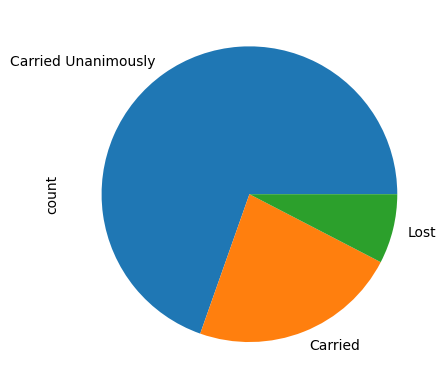

In [156]:
#[votes[col] = votes[' for col in ['meeting_type', 'vote', 'decision']]
votes = votes.astype({
    'meeting_type': 'category',
    'vote': 'category',
    'decision': 'category',
})
votes['vote_start_date_time'] = pd.to_datetime(votes.vote_start_date_time)
votes['vote_date'] = pd.to_datetime(votes.vote_date)
votes.decision.value_counts().plot(kind='pie')

## TimeSeries

We've already talked a bit about time and date handling, but the author of pandas wrote it to deal with time series data so it really excels here. The main objects to be aware of are

  * **Time Stamps**: Specific points in time usually recorded to the second or nanosecond
  * **Time Periods**: Specific blocks of (usually contiguous) time (e.g. months in a year)
  * **Time Deltas**: These types lets you do arithmetic on the above objects

and their associated indices. We need some dates to play with. There's a convenience function called `to_datetime` which can convert many "human readable" dates to a pd.Timestamp object

In [158]:
from datetime import datetime

moonwalk = pd.to_datetime('July 20, 1969, 20:17 UTC')
moonwalk

Timestamp('1969-07-20 20:17:00+0000', tz='UTC')

Timestamps have attributes which let you extract days, year, etc. Normally these will be reported as numbers, but the strftime method supports the usual format specifiers (The correspond with the libc specifiers, here's a reference http://strftime.org/)

In [159]:
moonwalk.year

1969

In [160]:
print(f"The moon walk took place on a {moonwalk.strftime('%A')}")

The moon walk took place on a Sunday


In [161]:
pd.to_datetime(datetime.utcnow(), utc=True)

Timestamp('2024-06-05 16:44:40.585343+0000', tz='UTC')

Let's look at another sample dataset. This time, it is a record of historical flight data. It contains various columns, we will look at

  * `activity_period`: The date for the record in the format yyyymm
  * `passenger_count`
  
We can parse the date into a DateTime with `pd.to_datetime` then set the result as the index. We can then slice dates and resample

In [164]:
r = requests.get('https://data.sfgov.org/resource/rkru-6vcg?$limit=10000')

flightsDF = pd.DataFrame(r.json())
flightsDF.head()

,activity_period,activity_period_start_date,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,data_as_of,data_loaded_at
0,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
1,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
2,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
3,199907,1999-07-01T00:00:00.000,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
4,199907,1999-07-01T00:00:00.000,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000


In [166]:
flightsDF['passenger_count'] = flightsDF['passenger_count'].astype(int)
flightsDF['date'] = pd.to_datetime(flightsDF['activity_period'], format='%Y%m')

flightsDF.set_index('date', inplace=True)
flightsDF.head()

,activity_period,activity_period_start_date,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,data_as_of,data_loaded_at
date,,,,,,,,,,,,,,,
1999-07-01,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
1999-07-01,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
1999-07-01,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
1999-07-01,199907,1999-07-01T00:00:00.000,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000
1999-07-01,199907,1999-07-01T00:00:00.000,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024-04-20T13:00:26.000,2024-05-20T07:01:53.000


The raw data is a bit granular so we'll resample, (we'll discuss resampling more below)

In [167]:
monthlyFlightsDF = flightsDF[['passenger_count']].resample('ME').sum()
monthlyFlightsDF.head()

,passenger_count
date,
1999-07-31,3976746
1999-08-31,3972694
1999-09-30,3341964
1999-10-31,3468846
1999-11-30,3145240


<Axes: xlabel='date'>

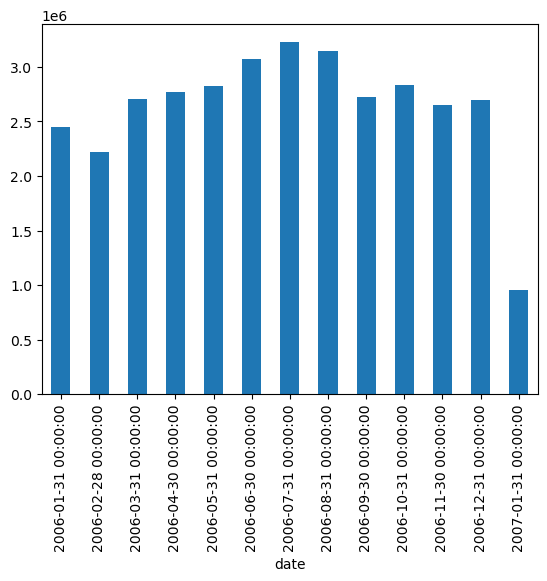

In [169]:
monthlyFlightsDF.loc['2006-01-01':, 'passenger_count'].plot(kind='bar')

Notice that "natural" indexing worked straight away. This is very handy!

Timestamp objects can also deal with arithmetic

In [170]:
flightsDF.index[-1] - flightsDF.index[0]

Timedelta('2741 days 00:00:00')

<Axes: xlabel='date'>

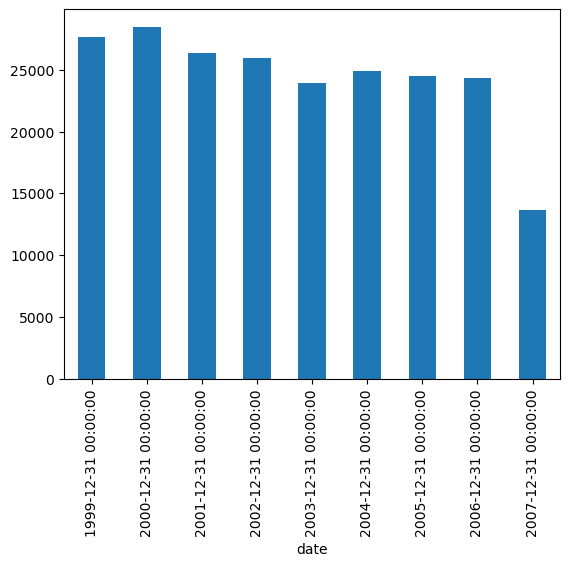

In [171]:
flightsDF['passenger_count'].resample('YE').mean().plot(kind='bar')

Again, the `value_counts` method can be very useful to get an idea of how categorical values are distributed...

In [172]:
flightsDF['geo_region'].value_counts()

geo_region
US                     3968
Asia                   2292
Europe                 1536
Canada                  909
Mexico                  757
Australia / Oceania     356
Central America         182
Name: count, dtype: int64

For many of the algorithms in scikit learn, we need to convert categorical variables into numerical values. The simplest case is [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) which Pandas can do this for us with the `.get_dummies` method (sklearn also has it's own methods, but it's handy to be able to do this in general).

In [173]:
airlines_one_hot = pd.get_dummies(flightsDF['operating_airline_iata_code'])
flightsDF = flightsDF.drop([
    'operating_airline_iata_code',
    'operating_airline',
    'published_airline',
    'published_airline_iata_code',
], axis = 1
                          )
flightsDF.join(airlines_one_hot).head()

,activity_period,activity_period_start_date,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,data_as_of,...,US,VS,WI,WN,WO,WS,XP,YV,YX,ZW
date,,,,,,,,,,,,,,,,,,,,,
1999-07-01,199907,1999-07-01T00:00:00.000,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,...,False,False,False,False,False,False,False,False,False,False
1999-07-01,199907,1999-07-01T00:00:00.000,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,...,False,False,False,False,False,False,False,False,False,False
1999-07-01,199907,1999-07-01T00:00:00.000,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,...,False,False,False,False,False,False,False,False,False,False
1999-07-01,199907,1999-07-01T00:00:00.000,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,...,False,False,False,False,False,False,False,False,False,False
1999-07-01,199907,1999-07-01T00:00:00.000,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-04-20T13:00:26.000,...,False,False,False,False,False,False,False,False,False,False


_**Exercise**: Try resampling to find the total passenger count each quarter_

## Grouping, Joining, Concatenating

When working with a new dataset, I recommend trying to stuff as much as you can into a single `DataFrame` to try to help find the basic patterns, but sooner or later you will want to do aggregate operations within a `DataFrame` (e.g. group together all of the rows by year and show the mean value of some other column) or combine two or more `DataFrame`s. 

This data set has some old information about car engine efficency

In [174]:
carsDF = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
)
carsDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [176]:
carsDF.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

### Groupby
Let's group things by `number_of_cylinders` and see how that affects mpg...

In [177]:
carsDF['mpg'].mean()

23.514572864321607

Calling `groupby` on it's own will give you a `DataFrameGroupBy` object. Informally you can think of this as an iterator for "sub"-`Dataframe`s or slices of your original `DataFrame`. You're expected to perform aggregate operations (e.g. `sum`, `mean` or generic `.apply` methods) on these groups to actually see some results.

In [179]:
carsDFbyCylinders = carsDF.groupby('cylinders')
carsDFbyCylinders

In [180]:
carsDFbyCylinders.describe()

mpg                                                        \
           count       mean       std   min    25%    50%    75%   max   
cylinders                                                                
3            4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7   
4          204.0  29.286765  5.710156  18.0  25.00  28.25  33.00  46.6   
5            3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4   
6           84.0  19.985714  3.807322  15.0  18.00  19.00  21.00  38.0   
8          103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6   

          displacement              ... acceleration       model_year  \
                 count        mean  ...          75%   max      count   
cylinders                           ...                                 
3                  4.0   72.500000  ...         13.5  13.5        4.0   
4                204.0  109.796569  ...         18.0  24.8      204.0   
5                  3.0  145.000000  ...         20.0  20.1        3.0   
6                 84.0  218.142857  ...         17.6  21.0       84.0   
8                103.0  345.009709  ...         14.0  22.2      103.0   

                                                                
                mean       std   min    25%   50%    75%   max  
cylinders                                                       
3          75.500000  3.696846  72.0  72.75  75.0  77.75  80.0  
4          77.073529  3.753420  70.0  74.00  78.0  80.00  82.0  
5          79.000000  1.000000  78.0  78.50  79.0  79.50  80.0  
6          75.928571  3.251638  70.0  74.00  76.0  78.00  82.0  
8          73.902913  3.021214  70.0  72.00  73.0  76.00  81.0  

[5 rows x 48 columns]

The typical aggregate operations are things like

  * mean()
  * sum()
  * median()
  * min()/max()
  * count()
  * nunique()
  * size()

In [182]:
carsDFbyCylinders.mean(numeric_only=True)

,mpg,displacement,horsepower,weight,acceleration,model_year
cylinders,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000
4,29.286765,109.796569,78.281407,2308.127451,16.601471,77.073529
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000
6,19.985714,218.142857,101.506024,3198.226190,16.263095,75.928571
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913


The `agg` method lets you apply arbitrary aggregate functions as well, e.g.

In [183]:
carsDFbyCylinders['mpg'].agg('std')

cylinders
3    2.564501
4    5.710156
5    8.228204
6    3.807322
8    2.836284
Name: mpg, dtype: float64

_**Exercise**: Try grouping my model year and looking at the median value for each group_

The object returned by `groupby` is an iterator, so...

In [186]:
for vroom, group in carsDFbyCylinders:
    print(f"There are {group.shape[0]} cars with {vroom} cylinders")

There are 4 cars with 3 cylinders
There are 204 cars with 4 cylinders
There are 3 cars with 5 cylinders
There are 84 cars with 6 cylinders
There are 103 cars with 8 cylinders


How are there possibly 4 cars with 3 cylinders?!

In [187]:
carsDFbyCylinders.get_group(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


We can also apply multiple operations at the same time. The `.agg()` method can take a list of the operations you want to perform (e.g. ["max", "min"])

In [188]:
carsDFbyCylinders['mpg'].agg(["min","max","mean"])

,min,max,mean
cylinders,,,
3,18.0,23.7,20.550000
4,18.0,46.6,29.286765
5,20.3,36.4,27.366667
6,15.0,38.0,19.985714
8,9.0,26.6,14.963107


We can filter based on our groups. This isn't the recommended way of doing the following, but let's manually group the cars by cylinder count, then find any particular cars that are more than 1.5 times the mean mpg of their group.

In [189]:
carsDF[
    carsDFbyCylinders.apply(lambda x: x.mpg > 1.5 * x.mpg.mean()).reset_index(level=0).mpg
]


/tmp/ipykernel_508/3590171030.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  carsDFbyCylinders.apply(lambda x: x.mpg > 1.5 * x.mpg.mean()).reset_index(level=0).mpg
/tmp/ipykernel_508/3590171030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  carsDF[


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
298,23.0,8,350.0,125.0,3900,17.4,79,usa,cadillac eldorado
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


There's actually a transform method lets you perform a group operation then use the results to update the rows. For example, we could calculate mean values for our groups, then look at how individual cars perform relative to that

In [190]:
means = carsDFbyCylinders.mpg.transform('mean')
carsDF[carsDF.mpg > 1.5 * means]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
298,23.0,8,350.0,125.0,3900,17.4,79,usa,cadillac eldorado
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


We could also look at the best and worst performing car relative to the group means, `idxmin` and `idxmax` are to pandas what `argmin` and `argmax` are to numpy (see also `nlargest`).

In [191]:
carsDF['mpg_mean'] = carsDF['mpg'] - means
carsDF.loc[carsDF.groupby('cylinders')['mpg_mean'].idxmax()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_mean
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,3.150000
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,17.313235
327,36.4,5,121.0,67.0,2950,19.9,80,europe,audi 5000s (diesel),9.033333
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel),18.014286
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls,11.636893


In [192]:
carsDF.loc[carsDF.groupby('cylinders')['mpg_mean'].idxmin()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_mean
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3,-2.550000
76,18.0,4,121.0,112.0,2933,14.5,72,europe,volvo 145e (sw),-11.286765
274,20.3,5,131.0,103.0,2830,15.9,78,europe,audi 5000,-7.066667
128,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova,-4.985714
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d,-5.963107


You can also group by multiple conditions, but you'll get a hierarchical index as the result

In [193]:
carsDF.groupby(['origin', 'cylinders']).mean(numeric_only=True)

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year      mpg_mean  
origin cylinders                                          
europe 4             16.722222   75.507937 -8.756536e-01  
       5             18.633333   79.000000  2.368476e-15  
       6             16.425000   78.250000  1.142857e-01  
japan  3             13.250000   75.500000 -8.881784e-16  
       4             16.569565   77.507246  2.308887e+00  
       6             13.550000   78.000000  3.897619e+00  
usa    4             16.526389   78.027778 -1.446487e+00  
       6             16.474324   75.635135 -3.222008e-01  
       8             12.955340   73.902913 -1.034771e-15

We won't cover Hierarchical indices, so for now we will just flatten the result by resetting the index

In [194]:
carsDF.groupby(['origin', 'cylinders'])['mpg'].mean().reset_index()

,origin,cylinders,mpg
0,europe,4,28.411111
1,europe,5,27.366667
2,europe,6,20.100000
3,japan,3,20.550000
4,japan,4,31.595652
5,japan,6,23.883333
6,usa,4,27.840278
7,usa,6,19.663514
8,usa,8,14.963107


N.B. `.transform` and `.apply` exist as methods of both ordinary DataFrames and `DataFrameGroupBy` objects, depending on what you want to do.

## Concatenate & Join

There are a handful of functions which handle concatenation. The main ones are `pd.concat`, `pd.join` and `pd.merge` and there is some overlap in exactly what they do so. You can combine either `Series` and `DataFrames` but we'll jump straight to `DataFrames`,

In [195]:
s1 = pd.DataFrame(
    {
        'upper': ['A', 'B', 'C'], 
        'lower': ['a', 'b', 'c']
    }, 
    columns=['upper', 'lower'], 
    index=[1,2,3]
)

s2 = pd.DataFrame(
    {
        'upper': ['D', 'E', 'F'],
        'lower': ['d', 'e', 'f']
    }, 
    columns=['upper', 'lower'],
    index=[1, 2, 3]
)
s2

,upper,lower
1,D,d
2,E,e
3,F,f


`pd.join` will combine by aligning on the index, but expects unique column names, we can use the suffix keyword to make our columns unique

In [196]:
s1.join(s2, lsuffix='_l', rsuffix='_r')

,upper_l,lower_l,upper_r,lower_r
1,A,a,D,d
2,B,b,E,e
3,C,c,F,f


With concat we can combine rows (we'll reindex to get unique index values in the result)

In [197]:
pd.concat([s1,s2]).reset_index()

,index,upper,lower
0,1,A,a
1,2,B,b
2,3,C,c
3,1,D,d
4,2,E,e
5,3,F,f


Notice that we enclosed the things we want to join as some sort of iterable (a `list` here).

`concat` can also combine columns

In [198]:
pd.concat([s1, s2], axis='columns')

,upper,lower,upper,lower
1,A,a,D,d
2,B,b,E,e
3,C,c,F,f


`pd.concat` will accept duplicate indices, but normally that indicates a problem with the data normalization. `concat` has a `verify_index` argument which can check for these problems and you can specify what you want to do with duplicates manually.

concat will often result in `NaN`s because some columns might not exist in both/all frames.

In [199]:
d4 = pd.DataFrame({'fruit': ['apple', 'orange'], 'veg': ['brocolli', 'carrot'], 'tree': ['cedar', 'alder']})
d5 = pd.DataFrame({'veg': ['onion', 'potato'], 'fruit': ['banana','grape']})
pd.concat([d4,d5], sort=False, ignore_index=True)

,fruit,veg,tree
0,apple,brocolli,cedar
1,orange,carrot,alder
2,banana,onion,NaN
3,grape,potato,NaN


Since the index wasn't important here, I threw it away and just accepted a new one.

In the general case joining DataFrames can get complex. The concat method can take a `join` keyword to specify a database like join stragegy (inner or outer), but `pd.merge` is a bit more flexible. It implements the usual relations

  * one-to-one (similar to a concat)
  * many-to-one
  * many-to-many

and lets us join based on column value(s). Here is an example of a many-to-one merge

In [200]:
adf1=pd.DataFrame({
    'class': ['insect', 'spider'], 
    'legs': [6, 8]}
)

adf2=pd.DataFrame({
    'name': ['molly', 'anna', 'stephen', 'mica'], 
    'class': ['insect','insect','spider','insect']}
)                     

print(adf1); print(adf2)

    class  legs
0  insect     6
1  spider     8
      name   class
0    molly  insect
1     anna  insect
2  stephen  spider
3     mica  insect


In [201]:
pd.merge(adf1, adf2)

,class,legs,name
0,insect,6,molly
1,insect,6,anna
2,insect,6,mica
3,spider,8,stephen


The _many-to-one_ is many different rows in adf2 being mapped to a single row in adf1 (insects). `pd.merge` also accepts a selection of keyword arguments so you can manually specify which columns to join, patch up name differences etc.

## Extra

Here is a dataset on UFO observations for the US and Canada, read it in and try to extract the following information

* _How many from each country?_
* _States with the most observations_
* _What is the most common shape observed in each country/state?_
* _Find the most recent report from each province in canada_
* _Look at the number of observations in California by month_
* _For each state find the ufo hotspot with a `.pivot table`_
  * _Since _lat_ and _lng_ are just coordinates, try plotting the hot spots_

In [202]:
from collections import defaultdict

ufoDF = pd.read_csv(
    'https://m2pi.syzygy.ca/data/UFOs_coord.csv',
    names=['Date', 'Country', 'City', 'State', 'Shape', 'Summary', 'lat', 'lng'],
    skiprows=[0],
    encoding='latin1',
)
d1 = pd.to_datetime(ufoDF.Date.str.replace('.', ':', regex=False), format='%m/%d/%y %H:%M', errors='coerce')
d2 = pd.to_datetime(ufoDF.Date.str.replace('.', ':', regex=False), format='%m/%d/%y %H:%M:%S', errors='coerce')
d3 = pd.to_datetime(ufoDF.Date.str.replace('.', ':', regex=False), format='%Y-%m-%d %H:%M:%S', errors='coerce')
d4 = pd.to_datetime(ufoDF.Date.str.replace('.', ':', regex=False), format='%m/%d/%y', errors='coerce')
ufoDF.loc[:, 'Date'] = pd.to_datetime(d1.fillna(d2).fillna(d3).fillna(d4))
ufoDF['Date'] = ufoDF['Date'].astype('datetime64[ns]')
ufoDF.head()

,Date,Country,City,State,Shape,Summary,lat,lng
0,2016-12-21 19:15:00,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,2016-12-21 00:00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,2016-12-20 22:30:00,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,2016-12-20 19:00:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,2016-12-19 21:53:00,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


How many from each country?

States with the most observations?

What is the most common shape observed in each country/state?

_Find the most recent report from each province in canada_

_Look at the number of observations in California by month_

* _For each state find the ufo hotspot with a `.pivot table`_
  * _Since _lat_ and _lng_ are just coordinates, try plotting the hot spots_

## Other bits and pieces...

In this section we'll just list some commonly used functions which didn't fit elsewhere, but you will probably see

* pd.sample: select random rows
* pd.cut: Bin data
* pd.corr: Calculate a correlation matrix
* pd.rolling: Rolling averages